<a href="https://colab.research.google.com/github/crpytoscooby/College/blob/master/ML_Assignment_2_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data_set = pd.read_csv("/content/Regression_Data_set_Batch1.csv - Regression_Data_set_Batch1.csv.csv")


In [10]:
data_set

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [11]:
data_set=data_set.replace('yes',1)

data_set

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,no,no,no,1,2,1,furnished
1,12250000,8960,4,4,4,1,no,no,no,1,3,no,furnished
2,12250000,9960,3,2,2,1,no,1,no,no,2,1,semi-furnished
3,12215000,7500,4,2,2,1,no,1,no,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,no,1,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,no,1,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,1,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [12]:
#replacing yes value by 1 and no value by 0
data_set=data_set.replace('no',0)
data_set

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


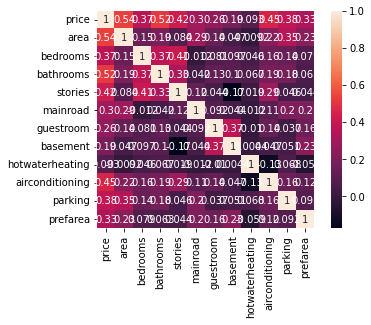

In [13]:
#correlation matrix
ax = sns.heatmap(data_set.corr(), square = True, annot=True)

In [18]:
#Defining p and q values
p=data_set[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']]
q=data_set[['price']]

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
p_train,p_test,q_train,q_test=train_test_split(p,q,test_size=0.25,random_state=0)

In [22]:
lr=LinearRegression()

In [23]:
#fitting data into regression
reg=lr.fit(p_train,q_train)

In [24]:
#predicting q values 
py_pred=lr.predict(p_test)

In [25]:
py_pred[0:5]

array([[3739574.72606521],
       [5997301.87363613],
       [4395522.4994253 ],
       [7061306.57155737],
       [3000534.72513986]])

Defining q values

In [26]:

q_test.head()

,price
239,4585000
113,6083000
325,4007500
66,6930000
479,2940000


In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
mean_squared_error(q_test,py_pred)

950738169770.7928

Root mean squared error

In [29]:

from math import sqrt
rms = sqrt(mean_squared_error(q_test,py_pred))

In [30]:
rms

975058.0340527393

In [34]:
#Accuracy of the dataset
lr.score(p_test,q_test)

0.6919673944442734

In [35]:
print("Coefficient",lr.coef_)

Coefficient [[2.52369689e+02 1.56312307e+05 9.93658574e+05 4.43302586e+05
  5.53927472e+05 4.98372568e+05 3.58554701e+05 1.24099090e+06
  8.91534240e+05 2.55619141e+05 6.68538238e+05]]


In [36]:
print("Intercept",lr.intercept_)

Intercept [-428651.31076166]


Import the seaborn library

In [37]:
import seaborn as sns

Plotting Regression Plots

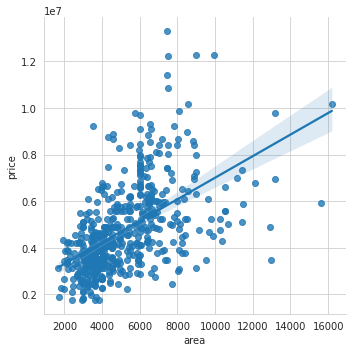

In [38]:
sns.set_style('whitegrid')
sns.lmplot(x ='area', y ='price', data = data_set)

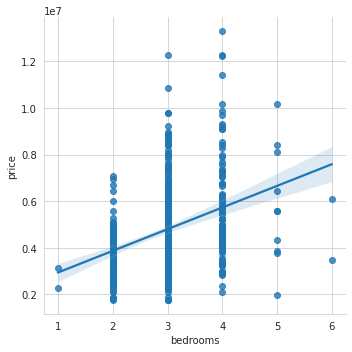

In [39]:
sns.lmplot(x ='bedrooms', y ='price', data = data_set)

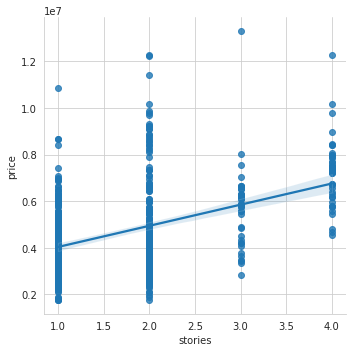

In [40]:
sns.lmplot(x ='stories', y ='price', data = data_set)

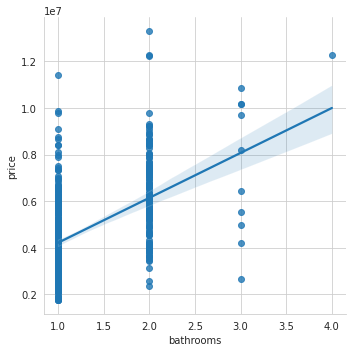

In [41]:
sns.lmplot(x ='bathrooms', y ='price', data = data_set)

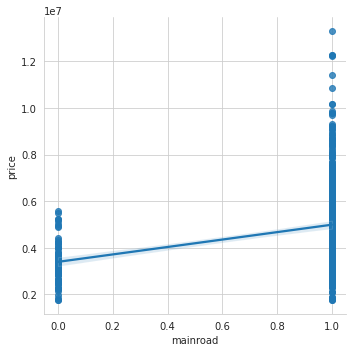

In [42]:
sns.lmplot(x ='mainroad', y ='price', data = data_set)

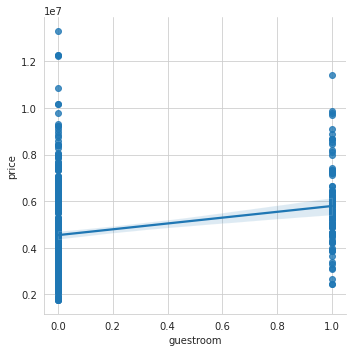

In [43]:
sns.lmplot(x ='guestroom', y ='price', data = data_set)

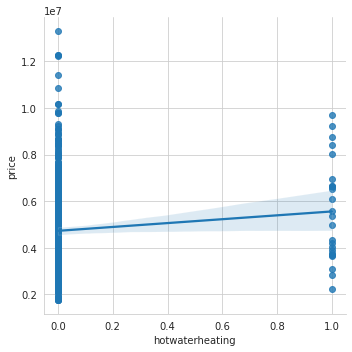

In [44]:
sns.lmplot(x ='hotwaterheating', y ='price', data = data_set)

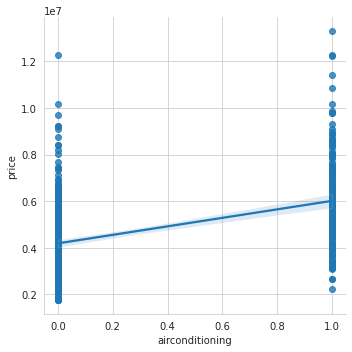

In [45]:
sns.lmplot(x ='airconditioning', y ='price', data = data_set)

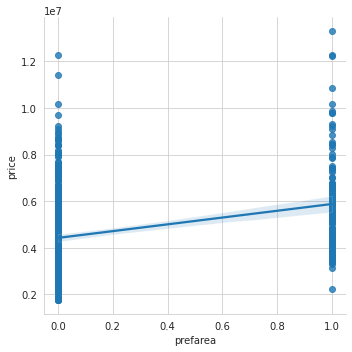

In [46]:
sns.lmplot(x ='prefarea', y ='price', data = data_set)

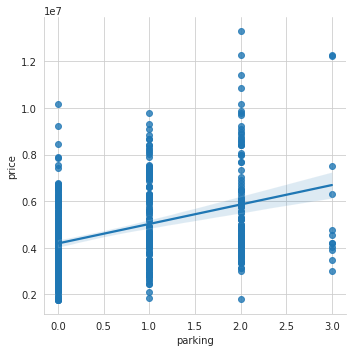

In [47]:
sns.lmplot(x ='parking', y ='price', data = data_set)

In [48]:
import statsmodels.api as sm

model = sm.OLS(p_train, q_train).fit()
print(model.summary())

ValueError: ignored